# ANN

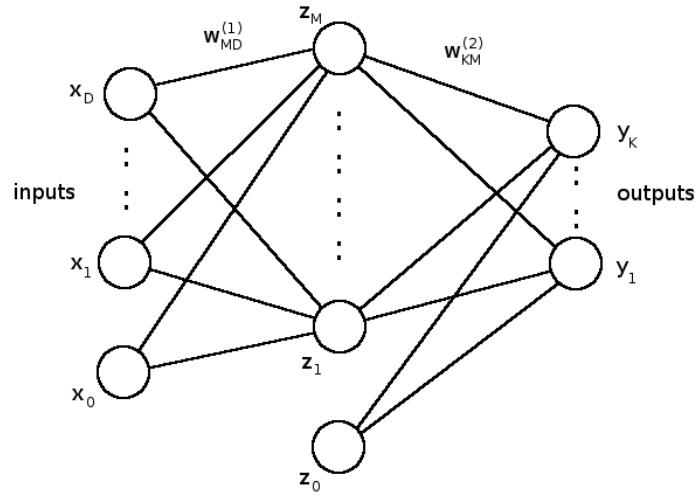

Let
* $D$ is a number of input dimensions;
* $K$ is a number of output dimensions;
* $N$ is a number of datapoints

* $x_{dn}$ is the $d^{th}$ feature of the $n^{th}$ datapoint.
* $y_{kn}$ is the $k^{th}$ output of the $n^{th}$ datapoint.

Network parameters
* $w_{ji}$ : layer-1 weight of node $j$ from input $i$.
* $b_j$ : layer-1 bias of node $j$.
* $v_{kj}$ : layer-2 weight of node $k$ from input $j$.
* $c_k$ : layer-2 bias of node $k$.


## Layer 1

Weighted input
* $a_{jn} = b_j + w_{j1} x_{1n} + w_{j2} x_{2n} + w_{j3} x_{3n} + \cdots + w_{jD} x_{Dn} = b_j + \sum_i w_{ji} \cdot x_{in}$ .

Layer-1 output
* $z_{jn} = h(a_{jn})$



## Layer 2

Weighted input
* $d_{kn} = c_k + v_{k1} z_{1n} + v_{k2} z_{2n} + v_{k3} z_{3n} + \cdots + v_{kM} z_{Mn} = c_k + \sum_j v_{kj} \cdot z_{jn}$ .

Layer-2 output
* $\hat{y}_{kn} = g(d_{kn})$


# Vectorization of MLP

* Input data $\mathbf{X} \in \mathbb{R}^{D \times N}$
* Output data $\mathbf{Y} \in \mathbb{R}^{K \times N}$
* Layer-1 weight $\mathbf{W} \in \mathbb{R}^{M \times D}$
* Layer-1 bias $\mathbf{B} \in \mathbb{R}^{M \times 1}$
* Layer-2 weight $\mathbf{V} \in \mathbb{R}^{K \times M}$
* Layer-2 bias $\mathbf{C} \in \mathbb{R}^{K \times 1}$

* $a_{jn} = b_j + \sum_i w_{ji} \cdot x_{in}$ for $j = 1, \ldots, M$; $n = 1, \ldots, N$.
  * $\mathbf{A}_{M \times N} = \mathbf{B}_{M \times 1} \oplus \mathbf{W}_{M \times D} \cdot \mathbf{X}_{D \times N}$.

    Note $\oplus$ is a **broadcasting** matrix addition.

* $z_{jn} = h(a_{jn})$
  * $\mathbf{Z}_{M \times N} = h(\mathbf{A}_{M \times N})$

    Note activation function $h(\mathbf{A}) \equiv [h(a_{jn})]$.

* $d_{kn} = c_k + \sum_j v_{kj} \cdot z_{jn}$ for k = 1, \ldots, K; n = 1, \ldots, N.

  * $\mathbf{D}_{K \times N} = \mathbf{C}_{K \times 1} \oplus \mathbf{V}_{K \times M} \cdot \mathbf{Z}_{M \times N}$.

* $\hat{y}_{kn} = g(d_{kn})$

  * $\mathbf{\hat{Y}}_{K \times N} = g(\mathbf{D}_{K \times N})$

    Note: $g(\cdot)$ is an output activation.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

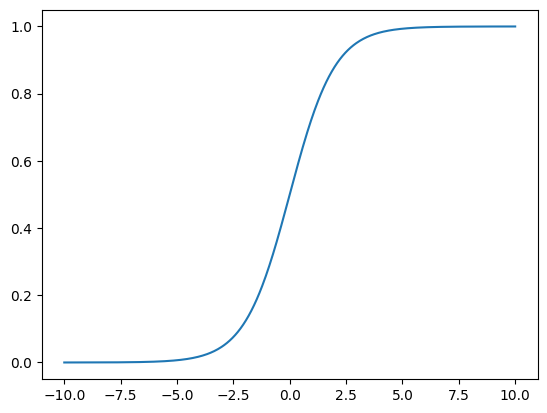

In [4]:
xs = np.linspace(-10, 10, 500)
plt.plot(xs, sigmoid(xs))

In [6]:
def mlp2(X, W, B, V, C, h=sigmoid, g=lambda a: a):
    '''
    X: D x N
    W: M x D
    B: M x 1
    V: K x M
    C: K x 1

    return Yp: K x N
    '''

    A = B + np.dot(W, X)
    Z = h(A)
    D = C + np.dot(V, Z)
    Yp = g(D)
    return Yp

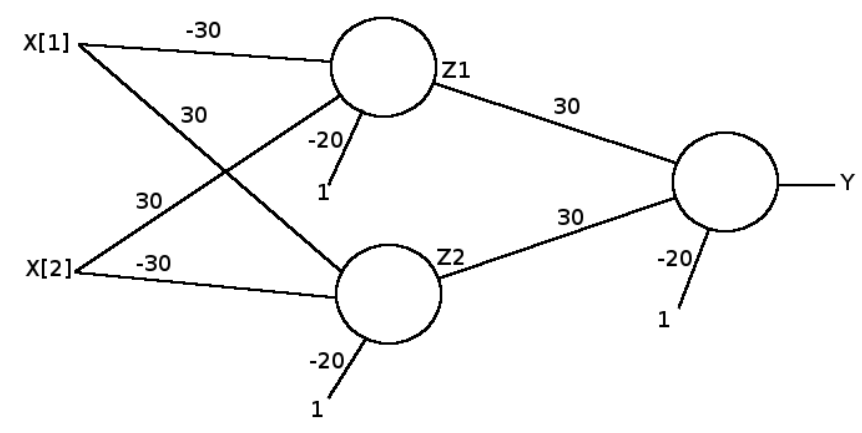

In [9]:
# X: D x N
X = np.array([[0,1,0,1],
              [0,0,1,1]])

# W: M x D
W = np.array([[-30, 30],
              [30, -30]])
# B: M x 1
B = np.array([[-20],
              [-20]])

# V: K x M
V = np.array([[30, 30]])

# C: K x 1
C = np.array([[-20]])

Yp = mlp2(X, W, B, V, C, h=sigmoid, g=sigmoid)

print(X)
print(Yp)

[[0 1 0 1]
 [0 0 1 1]]
[[2.06115387e-09 9.99954540e-01 9.99954540e-01 2.06115387e-09]]


In [10]:
def hardlimit(a):
    return (a > 0)*1

In [11]:
Yp = mlp2(X, W, B, V, C, h=hardlimit, g=hardlimit)

print(X)
print(Yp)

[[0 1 0 1]
 [0 0 1 1]]
[[0 1 1 0]]


# Error Backpropagation

* $E = \sum_n E_n$
* $E_n = \frac{1}{2} \sum_k (\hat{y}_{kn} - y_{kn})^2$


Find

* $\frac{\partial E_n}{\partial c_k}$ for $k = 1, \ldots, K$.
* $\frac{\partial E_n}{\partial v_{kj}}$ for $k = 1, \ldots, K$; $j = 1, \ldots, M$.
* $\frac{\partial E_n}{\partial b_j}$ for $j = 1, \ldots, M$.
* $\frac{\partial E_n}{\partial w_{ji}}$ for $j = 1, \ldots, M$; $i = 1, \ldots, D$.


Let denote

* $\delta_{kn}^{(2)} \equiv \frac{\partial E_n}{\partial d_{kn}}$

* $\delta_{jn}^{(1)} \equiv \frac{\partial E_n}{\partial a_{jn}}$

# Regression

* $E_n = \frac{1}{2} \sum_k (\hat{y}_{kn} - y_{kn})^2$

* Identity output activation:
$g(a) = a$
  * $\hat{y}_{kn} = d_{kn}$

First,

\begin{align}
\delta_{kn}^{(2)} &= \frac{\partial E_n}{\partial d_{kn}}
\\
&= \frac{1}{2}\frac{\partial \sum_r (\hat{y}_{rn} - y_{rn})^2}{\partial d_{kn}}
= \frac{1}{2} \sum_r \frac{\partial (\hat{y}_{rn} - y_{rn})^2}{\partial d_{kn}}
= \sum_r (\hat{y}_{rn} - y_{rn}) \frac{\partial (\hat{y}_{rn} - y_{rn})}{\partial d_{kn}}
\\
&= 0 + \cdots + 0 + (\hat{y}_{kn} - y_{kn}) \frac{\partial \hat{y}_{kn}}{\partial d_{kn}} + 0 + \cdots + 0
\\
&= \hat{y}_{kn} - y_{kn}
\end{align}

Second, condider $\delta_{jn}^{(1)} = \frac{\partial E_n}{a_{jn}}$


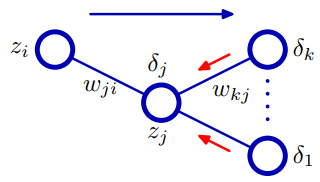

Since $a_{jn}$ affects $E_n$ through layer-2 nodes, then with the chain rule

\begin{align}
\frac{\partial E_n}{\partial a_{jn}}
&= \sum_k \frac{\partial E_n}{\partial d_{kn}} \cdot \frac{\partial d_{kn}}{\partial a_{jn}}
= = \sum_k \delta_{kn}^{(2)} \cdot \frac{\partial d_{kn}}{\partial a_{jn}}
\\
&= \sum_k \delta_{kn}^{(2)} \cdot \frac{\partial (c_k + \sum_r v_{kr} z_{rn})}{\partial a_{jn}} = \sum_k \delta_{kn}^{(2)} \cdot v_{kj}
\frac{\partial z_{jn}}{\partial a_{jn}}
\\
&= \sum_k \delta_{kn}^{(2)} \cdot v_{kj}
\frac{\partial h(a_{jn})}{\partial a_{jn}}
= \sum_k \delta_{kn}^{(2)} \cdot v_{kj} h'(a_{jn})
\\
&= h'(a_{jn}) \sum_k \delta_{kn}^{(2)} \cdot v_{kj}
\end{align}



Let consider $h'(a) = \frac{d h(a)}{d a}$.

For sigmoid,

\begin{align}
h'(a) &= \frac{d h(a)}{d a} = \frac{d \frac{1}{1 + \exp(-a)}}{d a}
\\
&= \frac{\exp(-a)}{(1 + \exp(-a))^2}
\end{align}

Re-arrange to make it nicer.
\begin{align}
h'(a) &=
\left( \frac{1}{1 + \exp(-a)} \right) \left(\frac{\exp(-a)}{1 + \exp(-a)}\right)
\\
&= h(a) \cdot \left(\frac{1 + \exp(-a) - 1}{1 + \exp(-a)}\right)
= h(a) \cdot \left(\frac{1 + \exp(-a)}{1 + \exp(-a)} - \frac{1}{1 + \exp(-a)}\right)
\\
&= h(a) \cdot \left(1 - h(a) \right)
\end{align}


Let get back to the gradient.

## Layer-2 bias.

\begin{align}
\frac{\partial E_n}{\partial c_k} &= \frac{\partial E_n}{\partial d_{kn}} \cdot \frac{\partial d_{kn}}{\partial c_k}
\\
&= \delta_{kn}^{(2)} \frac{\partial (c_k + \sum_j v_{kj} z_{jn})}{\partial c_k}
\\
&= \delta_{kn}^{(2)}
\end{align}
for $k = 1, \ldots, K$.


## Layer-2 weight.

\begin{align}
\frac{\partial E_n}{\partial v_{kj}}
&= \frac{\partial E_n}{\partial d_{kn}} \cdot \frac{\partial d_{kn}}{\partial v_{kj}}
\\
&= \delta_{kn}^{(2)} \frac{\partial (c_k + \sum_r v_{kr} z_{rn})}{\partial v_{kj}}
\\
&= \delta_{kn}^{(2)} \cdot z_{jn}
\end{align}

## Layer-1 bias.

\begin{align}
\frac{\partial E_n}{\partial b_j} &= \frac{\partial E_n}{\partial a_{jn}} \cdot \frac{\partial a_{jn}}{\partial b_j}
\\
&= \delta_{jn}^{(1)} \frac{\partial (b_j + \sum_i w_{ji} x_{in})}{\partial b_j}
\\
&= \delta_{jn}^{(1)}
\end{align}
for $j = 1, \ldots, M$.

## Layer-1 weight.

\begin{align}
\frac{\partial E_n}{\partial w_{ji}} &= \frac{\partial E_n}{\partial a_{jn}} \cdot \frac{\partial a_{jn}}{\partial w_{ji}}
\\
&= \delta_{jn}^{(1)} \frac{\partial (b_j + \sum_r w_{jr} x_{rn})}{\partial w_{ji}}
\\
&= \delta_{jn}^{(1)} \cdot x_{in}
\end{align}
for $j = 1, \ldots, M$.

# General pattern

So, you probably see the pattern now.

It is,
* Let $z_i^{(0)} \equiv x_i$.
* For layer $q$ from $1$ to $Q$,
  * $a_j^{(q)} = b_j^{(q)} + \sum_i w_{ji}^{(q)} \cdot z_i^{(q-1)}$
  * $z_j^{(q)} = h(a_j)$
* Predict $\hat{y}_j \equiv z_j^{(Q)}$.


The gradient $\nabla_\mathbf{w} E$ can be obtained,
* $\delta_j^{(Q)} = \hat{y}_j - y_j$
* $\delta_j^{(q)} = h'(a_j^{(q)}) \sum_k \delta_k^{(q+1)} \cdot w_{kj}^{(q+1)} $ for $q = 1, \ldots, Q -1$.
* $h'(a) = h(a) \cdot (1 - h(a))$.
* $\frac{\partial E}{\partial b_j^{(q)}} = \delta_j^{(q)}$ for $q = 1, \ldots, Q$.
* $\frac{\partial E}{\partial w_{ji}^{(q)}} = \delta_j^{(q)} \cdot z_i^{(q-1)}$ for $q = 1, \ldots, Q$.


# Vectorization of BP

## Output

1. $\delta_{kn}^{(Q)} = \hat{y}_{kn} - y_{kn}$

   $\mathbf{\Delta_2}_{K \times N} = \mathbf{\hat{Y}}_{K \times N} - \mathbf{Y}_{K \times N}$

2. $\frac{\partial E}{\partial b_k^{(Q)}} = \frac{\partial \sum_n E_n}{\partial b_k^{(Q)}} = \sum_n \delta_{kn}^{(Q)}$

   $\mathbf{E_c}_{K \times 1} = \mathbf{\Delta_2}_{K \times N} \cdot \mathbf{1}_{N \times 1}$

3. $\frac{\partial E}{\partial w_{kj}^{(Q)}} = \frac{\partial \sum_n E_n}{\partial w_{kj}^{(Q)}} = \sum_n \delta_{kn}^{(Q)} \cdot z_{jn}^{(Q-1)}$

   $\mathbf{E_v}_{K \times M} = \mathbf{\Delta_2}_{K \times N} \cdot \mathbf{Z}^T_{N \times M}$


## Inner layer

1. $\delta_{jn}^{(q)} = h'(a_{jn}^{(q)}) \sum_k \delta_{kn}^{(q+1)} \cdot w_{kj}^{(q+1)} $
   and $h'(a) = h(a) \cdot (1 - h(a))$

   $\mathbf{\Delta_1}_{M \times N} =    
   \mathbf{Z}_{M \times N} \odot (1 + \mathbf{Z}_{M \times N}) \odot \left(\mathbf{V}^T_{M \times K} \cdot \mathbf{\Delta_2}_{K \times N} \right)$

2. $\frac{\partial E}{\partial b_j^{(q)}} = \frac{\partial \sum_n E_n}{\partial b_j^{(q)}} = \sum_n \delta_{jn}^{(q)}$

   $\mathbf{E_b}_{M \times 1} = \mathbf{\Delta_1}_{M \times N} \cdot \mathbf{1}_{N \times 1}$

3. $\frac{\partial E}{\partial w_{ji}^{(q)}} = \frac{\partial \sum_n E_n}{\partial w_{ji}^{(q)}} = \sum_n \delta_{jn}^{(q)} \cdot z_{in}^{(q-1)}$

   $\mathbf{E_w}_{M \times D} = \mathbf{\Delta_1}_{M \times N} \cdot \mathbf{X}^T_{N \times D}$


In [24]:
def train_mlp(lr, nepochs, X, Y, W, B, V, C, h=sigmoid, g=lambda a: a):
    '''
    X: D x N
    Y: K x N
    W: M x D
    B: M x 1
    V: K x M
    C: K x 1

    return Wt, Bt, Vt, Ct, losses
    '''

    _, N = X.shape
    losses = []

    for i in range(nepochs):

        # Forward pass
        A = B + np.dot(W, X)
        Z = h(A)  # M x N
        D = C + np.dot(V, Z)
        Yp = g(D) # K x N

        # Backprop
        D2 = Yp - Y                               # K x N

        dEc = np.sum(D2, axis=1).reshape((-1,1))  # K x 1
        dEv = np.dot(D2, Z.T)                     # K x M

        dH = np.multiply(Z, 1 - Z)
        D1 = np.multiply(dH, np.dot(V.T, D2))     # M x N

        dEb = np.sum(D1, axis=1).reshape((-1,1))  # M x 1
        dEw = np.dot(D1, X.T)                     # M x D

        # Update weights with GD
        C -= lr/N * dEc
        V -= lr/N * dEv
        B -= lr/N * dEb
        W -= lr/N * dEw

        losses.append(np.sum(D2**2)/N)
    # end for i

    return W, B, V, C, losses



[[0 1 0 1]
 [0 0 1 1]]
[[-1.18144743 -1.25135645 -1.18007961 -1.24947786]]


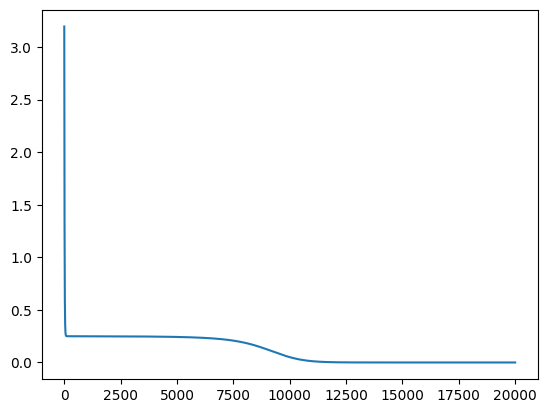

In [28]:
# X: D x N
X = np.array([[0,1,0,1],
              [0,0,1,1]])
Y = np.array([[0,1,1,0]])


W = np.random.normal(0, 1, 4).reshape((2,2)) # M x D
B = np.random.normal(0, 1, 2).reshape((2,1)) # M x 1
V = np.random.normal(0, 1, 2).reshape((1,2)) # K x M
C = np.random.normal(0, 1, 1).reshape((1,1)) # K x 1

Yp = mlp2(X, W, B, V, C, h=sigmoid)

print(X)
print(Yp)

Wt, Bt, Vt, Ct, tlosses = train_mlp(0.03, 20000, X, Y, W, B, V, C)

plt.plot(tlosses)

In [32]:
Yp = mlp2(X, Wt, Bt, Vt, Ct, h=sigmoid)

print(X)
print(Yp)

print(np.round(Yp,4))

[[0 1 0 1]
 [0 0 1 1]]
[[2.38817538e-05 9.99985236e-01 9.99984395e-01 9.65240251e-06]]
[[0. 1. 1. 0.]]
